# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

* NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [55]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

* Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

* Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example: 

    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 

### We also provide pickle file in the article lecture right before the video lectures.

In [93]:
#Bank of America
BAC = data.DataReader("BAC", 'yahoo', start="2006-01-01", end="2020-01-01")

#Goldman Sachs
GS = data.DataReader("C", 'yahoo', start="2006-01-01", end="2020-01-01")

#JPMorgan Chaase
JPM = data.DataReader("JPM", 'yahoo', start="2006-01-01", end="2020-01-01")

#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start="2006-01-01",end="2020-01-01")


In [94]:
JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.503391
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.350431
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.430248
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.616457
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,27.048759


* Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [95]:
tickers = ['BAC', 'GS', 'JPM', 'WFC']

* Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [96]:
bank_stocks = pd.concat([BAC, GS, JPM, WFC], axis=1, keys=tickers)

* Set the column name levels (this is filled out for you):

In [97]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

* Check the head of the bank_stocks dataframe.

In [98]:
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2019-12-24   35.279999  35.119999  35.189999  35.220001  13805400.0   
2019-12-26   35.560001  35.290001  35.320000  35.520000  26992100.0   
2019-12-27   35.720001  35.259998  35.700001  35.349998  28111300.0   
2019-12-30   35.650002  35.090000  35.570000  35.150002  30705100.0   
2019-12-31   35.259998  34.970001  35.029999  35.220001  29630100.0   

Bank Ticker                     GS                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106018  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743824  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787266  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736576  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758301  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2019-12-24   33.814240   78.940002   78.459999   78.699997   78.589996  ...   
2019-12-26   34.102264   79.839996   78.650002   78.750000   79.830002  ...   
2019-12-27   33.939049   80.180000   79.580002   80.000000   79.669998  ...   
2019-12-30   33.747032   80.419998   79.339996   80.150002   79.510002  ...   
2019-12-31   33.814240   79.940002   79.099998   79.320000   79.889999  ...   

Bank Ticker         JPM                                            WFC  \
Stock Info         Open       Close      Volume   Adj Close       High   
Date                                                                     
2006-01-03    39.830002   40.189999  12838600.0   26.503391  31.975000   
2006-01-04    39.779999   39.619999  13491500.0   26.350431  31.820000   
2006-01-05    39.610001   39.740002   8109400.0   26.430248  31.555000   
2006-01-06    39.919998   40.020000   7966900.0   26.616457  31.775000   
2006-01-09    39.880001   40.669998  16575200.0   27.048759  31.825001   
...                 ...         ...         ...         ...        ...   
2019-12-24   137.330002  137.580002   3324300.0  129.506668  54.040001   
2019-12-26   137.889999  139.039993   6770900.0  130.880997  54.389999   
2019-12-27   139.300003  139.139999   7868200.0  130.975128  54.320000   
2019-12-30   139.899994  138.630005   6963000.0  130.495071  54.259998   
2019-12-31   138.509995  139.399994   7201600.0  131.219864  53.820000   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.444866  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.207741  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.185303  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.303873  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.300667  
...                ...        ...        ...         ...        ...  
2019-12-24   53.740002  53.950001  53.820000   4635500.0  51.044315  
2019-12-26   53.950001  54.049999  54.150002  12517100.0  51.357300  
2019-12-27   53.869999  54.290001  53.919998   9892000.0  51.139156  
2019-12-30   53.50000

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

* What is the max Close price for each bank's stock throughout the time period?

In [99]:
# for tick in tickers:
# 	print(tick, bank_stocks[tick]['Close'].max())

bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
GS     564.099976
JPM    139.399994
WFC     65.930000
dtype: float64

* Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [100]:
returns = pd.DataFrame()

* We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [101]:
for tick in tickers:
	returns[tick + " Returns"] = bank_stocks[tick]['Close'].pct_change()

In [102]:
returns.head()

,BAC Returns,GS Returns,JPM Returns,WFC Returns
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.016242,-0.000158


* Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

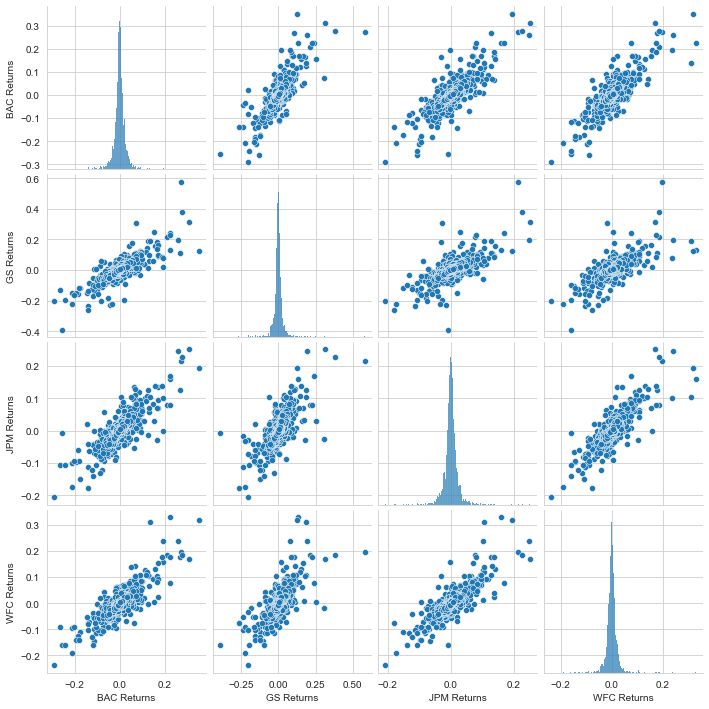

In [103]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

* Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [104]:
returns.idxmax()

BAC Returns   2009-04-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [105]:
returns.idxmin()

BAC Returns   2009-01-20
GS Returns    2009-02-27
JPM Returns   2009-01-20
WFC Returns   2009-01-20
dtype: datetime64[ns]

* You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? 

* Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [106]:
returns.std()

BAC Returns    0.032158
GS Returns     0.033750
JPM Returns    0.024401
WFC Returns    0.026551
dtype: float64

In [107]:
returns['2015-05-01': '2015-12-31'].std()

BAC Returns    0.016448
GS Returns     0.015806
JPM Returns    0.014123
WFC Returns    0.013176
dtype: float64

* Create a distplot using seaborn of the 2015 returns for Morgan Stanley 

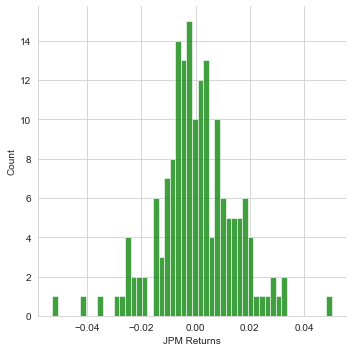

In [108]:
sns.displot(returns['2015-05-01': '2015-12-31']['JPM Returns'],color='green', bins=50)

* Create a distplot using seaborn of the 2008 returns for CitiGroup 

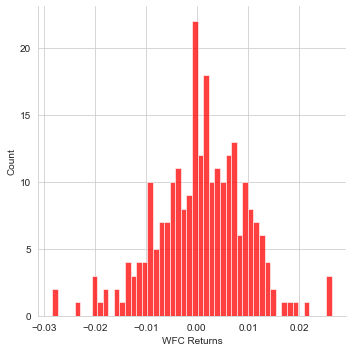

In [109]:
sns.displot(returns['2014-01-01': '2014-12-31']['WFC Returns'], bins=50,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

* Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

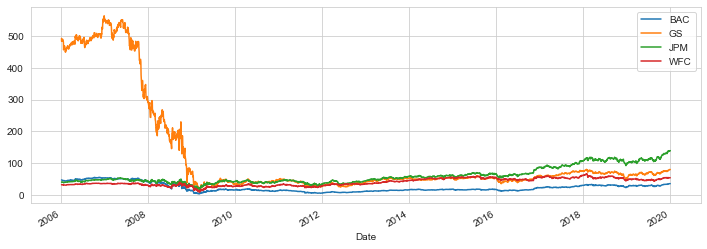

In [112]:
for tick in tickers:
	bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))

plt.legend()

In [117]:
bank_stocks.xs(key="Close", axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

* Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

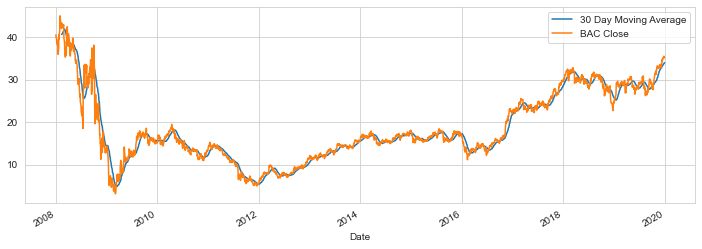

In [125]:
plt.figure(figsize=(12,4))
BAC['Close']['2008-01-01': '2020-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close']['2008-01-01': '2020-01-01'].plot(label='BAC Close')
plt.legend()


* Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

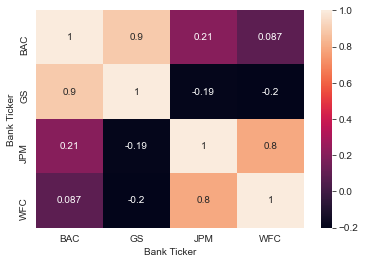

In [128]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

* Optional: Use seaborn's clustermap to cluster the correlations together:

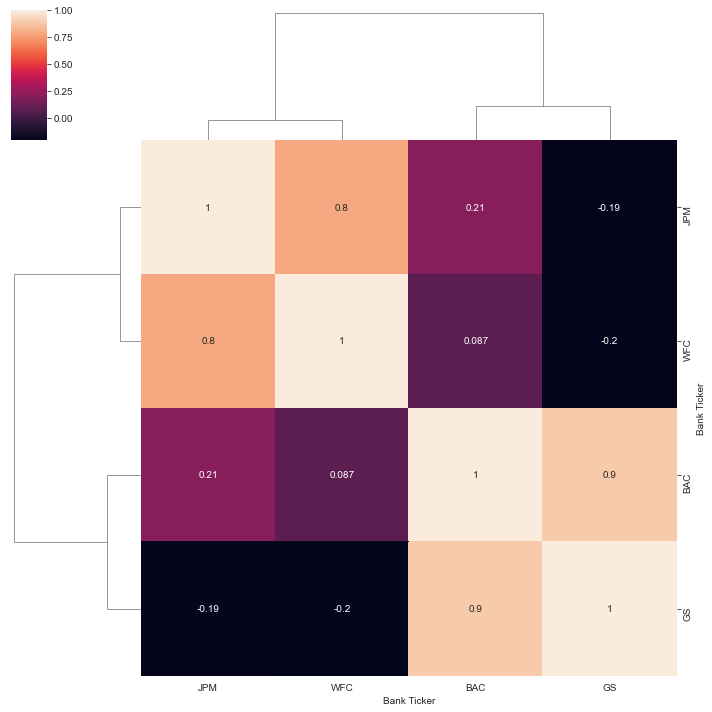

In [129]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

* Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [131]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [138]:
plt.figure(figsize=(12,4))
BAC_Candle = BAC[['Open', 'High', 'Low', 'Close']]['2010-01-01': '2020-01-01']

BAC_Candle.iplot(kind='candle')

<Figure size 864x288 with 0 Axes>

* Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [140]:
JPM['Close']['2015-01-01': '2016-01-01'].ta_plot(study='sma', periods=[20,50,100])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [141]:
BAC['Close']['2015-01-01': '2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.